In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Dataset11-Weather-Data.csv')
data.head()

data.shape
data.columns
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
jxs

In [ ]:
data.Weather.value_counts()


,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [ ]:
data.Weather.nunique()

50

In [ ]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

In [ ]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [ ]:
from itertools import chain
flat_list = list(chain(list_of_lists))
flat_list

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [ ]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+FOG'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'


In [ ]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [ ]:
data['Std_Weather'] = data['Weather'].apply(lambda x: Get_Weather(Create_list(x)))
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [ ]:
data.Std_Weather.value_counts()

,count
Std_Weather,
Cloudy,3797
Clear,3432
RAIN,603
SNOW,556
FOG,241
RAIN+FOG,129
SNOW+FOG,26


<Axes: xlabel='Std_Weather', ylabel='count'>

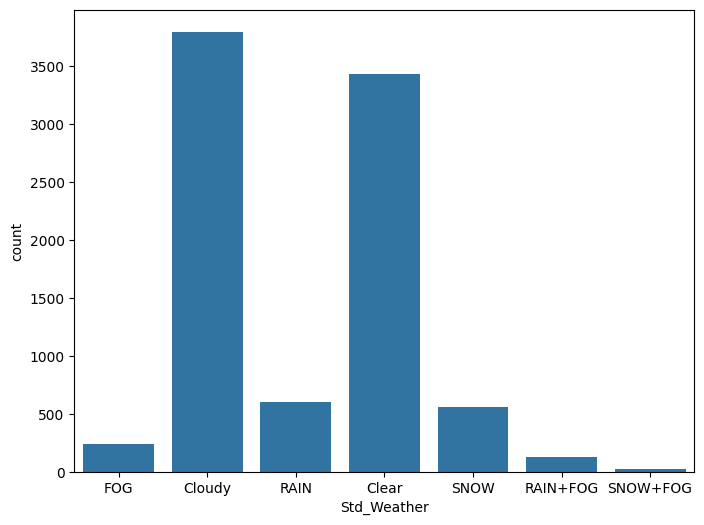

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data= data, x='Std_Weather')

In [ ]:
cloudy_df = data[data['Std_Weather'] == 'Cloudy'].sample(600)
cloudy_df.shape


(600, 9)

In [ ]:
clear_df = data[data['Std_Weather'] == 'Clear'].sample(600)
clear_df.shape

(600, 9)

In [ ]:
rain_df = data[data['Std_Weather'] == 'RAIN']
rain_df.shape



(603, 9)

In [ ]:
snow_df = data[data['Std_Weather'] == 'SNOW']
snow_df.shape

(556, 9)

create new dataset:


In [ ]:
weather_df = pd.concat([cloudy_df, clear_df, rain_df, snow_df], axis = 0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
5514,8/17/2012 18:00,23.9,16.1,62,24,48.3,100.19,Mostly Cloudy,Cloudy
4532,7/7/2012 20:00,25.5,14.5,51,9,48.3,100.43,Mostly Cloudy,Cloudy
6686,10/5/2012 14:00,20.2,15.6,75,19,24.1,100.60,Mostly Cloudy,Cloudy
4712,7/15/2012 8:00,25.8,17.9,62,15,24.1,101.24,Cloudy,Cloudy
1289,2/23/2012 17:00,2.3,-3.7,64,24,24.1,99.82,Mostly Cloudy,Cloudy


In [ ]:
weather_df.shape
weather_df.Std_Weather.value_counts()

,count
Std_Weather,
RAIN,603
Cloudy,600
Clear,600
SNOW,556


In [ ]:
weather_df.drop(columns = ['Date/Time','Weather'], axis = 1, inplace = True)
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
5514,23.9,16.1,62,24,48.3,100.19,Cloudy
4532,25.5,14.5,51,9,48.3,100.43,Cloudy
6686,20.2,15.6,75,19,24.1,100.60,Cloudy
4712,25.8,17.9,62,15,24.1,101.24,Cloudy
1289,2.3,-3.7,64,24,24.1,99.82,Cloudy


In [ ]:
weather_df[weather_df.duplicated()]
weather_df.isnull().sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Std_Weather,0


data visulaiztion

In [ ]:
cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

In [ ]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.939492,-0.210808,-0.124272,0.375428,-0.120663
Dew Point Temp_C,0.939492,1.000000,0.130166,-0.124568,0.159647,-0.232556
Rel Hum_%,-0.210808,0.130166,1.000000,0.008203,-0.656038,-0.339722
Wind Speed_km/h,-0.124272,-0.124568,0.008203,1.000000,-0.135812,-0.383887
Visibility_km,0.375428,0.159647,-0.656038,-0.135812,1.000000,0.332061
Press_kPa,-0.120663,-0.232556,-0.339722,-0.383887,0.332061,1.000000


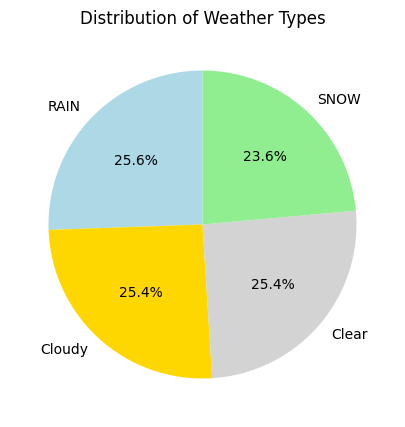

In [ ]:
import matplotlib.pyplot as plt
x = weather_df['Std_Weather'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])
label_Encoder.classes_
weather_df.head()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
5514,23.9,16.1,62,24,48.3,100.19,1
4532,25.5,14.5,51,9,48.3,100.43,1
6686,20.2,15.6,75,19,24.1,100.60,1
4712,25.8,17.9,62,15,24.1,101.24,1
1289,2.3,-3.7,64,24,24.1,99.82,1


In [ ]:
weather_df.Std_Weather.value_counts()

,count
Std_Weather,
2,603
1,600
0,600
3,556


In [ ]:
X = weather_df.drop(['Std_Weather'], axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
5514,23.9,16.1,62,24,48.3,100.19
4532,25.5,14.5,51,9,48.3,100.43
6686,20.2,15.6,75,19,24.1,100.60
4712,25.8,17.9,62,15,24.1,101.24
1289,2.3,-3.7,64,24,24.1,99.82
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [ ]:
y = weather_df['Std_Weather']
y

,Std_Weather
5514,1
4532,1
6686,1
4712,1
1289,1
...,...
8779,3
8780,3
8781,3
8782,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

dtc = DecisionTreeClassifier()
dtc = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(X_train, y_train)

plt.figure(figsize=(200, 150))
plot_tree(dtc, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.title('Decision Tree:Entropy')
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')


Accuracy: 0.56
Precision: 0.60
Recall: 0.56
F1 Score: 0.54


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[97 16  3  6]
 [77 35  7  5]
 [26 32 56 19]
 [14  2  2 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.80      0.58       122
           1       0.41      0.28      0.33       124
           2       0.82      0.42      0.56       133
           3       0.71      0.81      0.76        93

    accuracy                           0.56       472
   macro avg       0.60      0.58      0.56       472
weighted avg       0.60      0.56      0.54       472



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



rfc = RandomForestClassifier(n_estimators=10, criterion="entropy")
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')




Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.67


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[ 77  33  10   2]
 [ 41  60  15   8]
 [  4  23 101   5]
 [  3   7   5  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       122
           1       0.49      0.48      0.49       124
           2       0.77      0.76      0.77       133
           3       0.84      0.84      0.84        93

    accuracy                           0.67       472
   macro avg       0.68      0.68      0.68       472
weighted avg       0.67      0.67      0.67       472



In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [ ]:
svc_model = SVC()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

In [ ]:
model_list = [svc_model, lr_model, knn_model, nb_model, dt_model, rf_model]

In [ ]:
acc_list = []
precision_list = []
recall_list = []
F1_list = []
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    F1_list.append(f1)


In [ ]:
acc_list


[0.6292372881355932,
 0.6038135593220338,
 0.614406779661017,
 0.5783898305084746,
 0.6228813559322034,
 0.6588983050847458]

In [ ]:
precision_list

[0.6241657865735722,
 0.59415040624607,
 0.6209182887684226,
 0.5515234556824498,
 0.6234418690220027,
 0.6559728588011041]

In [ ]:
recall_list

[0.6292372881355932,
 0.6038135593220338,
 0.614406779661017,
 0.5783898305084746,
 0.6228813559322034,
 0.6588983050847458]

In [ ]:
model_df = pd.DataFrame({'Model': [ 'SVC', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'], 'Accuracy': acc_list, 'Precision' : precision_list, 'Recall' : recall_list,'F1 Score': F1_list })
model_df

,Model,Accuracy,Precision,Recall,F1 Score
0,SVC,0.629237,0.624166,0.629237,0.623063
1,Logistic Regression,0.603814,0.594150,0.603814,0.597330
2,KNN,0.614407,0.620918,0.614407,0.614965
3,Naive Bayes,0.578390,0.551523,0.578390,0.552419
4,Decision Tree,0.622881,0.623442,0.622881,0.621864
5,Random Forest,0.658898,0.655973,0.658898,0.656387


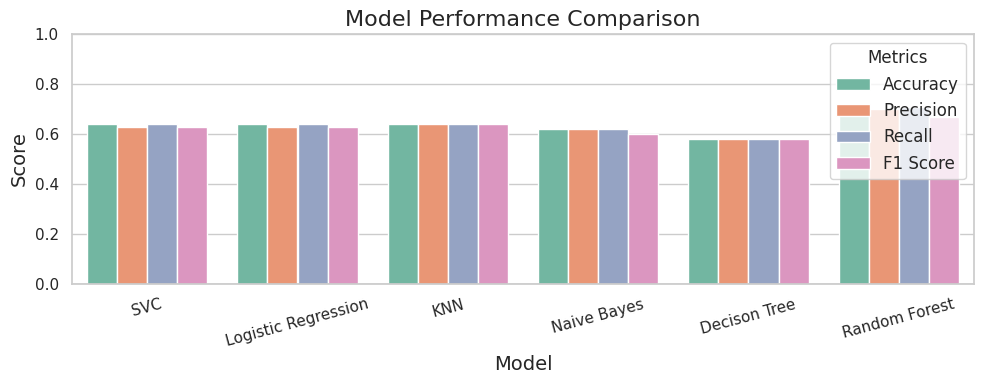

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
model_performance = {
    'Model': [ 'SVC', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Decison Tree', 'Random Forest'],
    'Accuracy': [0.64, 0.64, 0.64, 0.62,0.58,0.71],
    'Precision': [0.63, 0.63, 0.64, 0.62,0.58,0.70],
    'Recall': [0.64, 0.64, 0.64, 0.62,0.58,0.71],
    'F1 Score': [0.63, 0.63, 0.64, 0.60,0.58,0.67]

}

performance_df = pd.DataFrame(model_performance)
performance_df_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid")

sns.barplot(data=performance_df_melted, x='Model', y='Score', hue='Metric', palette='Set2')


plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='Metrics', fontsize=12)
plt.xticks(rotation=15)


plt.tight_layout()
plt.show()

<ipython-input-42-0b0ebc3b4e01>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='Set2')


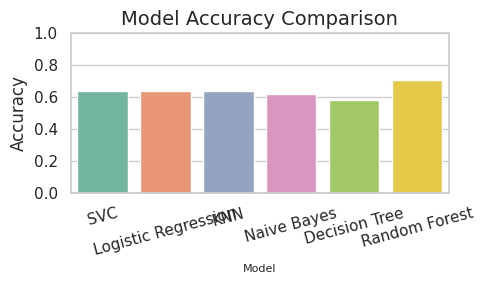

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_performance = {
    'Model': ['SVC', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.64, 0.64, 0.64, 0.62, 0.58, 0.71],
}
performance_df = pd.DataFrame(model_performance)

plt.figure(figsize=(5, 3))
sns.barplot(data=performance_df, x='Model', y='Accuracy', palette='Set2')

plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()